## 学习 batches 使用

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [173]:
x_data = np.linspace(0.0,10.0,1000000)
print(x_data)

[0.000000e+00 1.000001e-05 2.000002e-05 ... 9.999980e+00 9.999990e+00
 1.000000e+01]


In [174]:
noise = np.random.randn(len(x_data))
print(noise)

[-0.59569413  0.25395516 -0.1639105  ...  0.98061613  0.68994537
  0.74076822]


In [175]:
y_true = (0.5 * x_data) + 5 + noise

In [176]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [177]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [178]:
my_data = pd.concat([x_df,y_df],axis=1)

In [179]:
my_data.head()

,X Data,Y
0,0.00000,4.404306
1,0.00001,5.253960
2,0.00002,4.836100
3,0.00003,2.445025
4,0.00004,5.741199


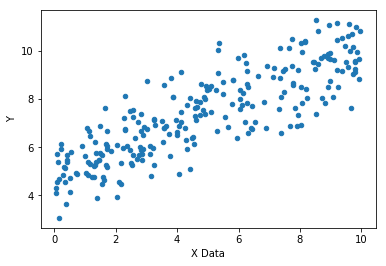

In [180]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [181]:
batch_size = 8

In [182]:
# sm = len(x_data)
# print(sm)
# rand_ind = np.random.randint(low=sm, size=batch_size)
# print(type(rand_ind), rand_ind)

# print('rand_ind:',rand_ind, type(rand_ind))

# what = x_data[rand_ind]
# print('what=',what)

# a = np.array([1,2,3,4])
# print('a', a, type(a))
# b = np.array([1,2]) # numpy 可这样进行 slice 操作，参数是索引
# print('b',b, type(b))

# what2 = a[b]
# print('what2', what2)

In [183]:
np.random.randn(2)

array([-0.58992011, -0.40663563])

In [184]:
m = tf.Variable(1.13)
b = tf.Variable(0.3)

In [185]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [186]:
y_model = m*xph + b

In [187]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [188]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [189]:
init = tf.global_variables_initializer()

In [197]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    
    for i in range(batches):
        # rand_index 是随机索引数组
        rand_ind = np.random.randint(low=len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
        
    model_m, model_b = sess.run([m,b])

# with tf.Session() as sess:
    
#     sess.run(init)
    
#     batches = 1000
    
#     for i in range(batches):
        
#         rand_ind = np.random.randint(len(x_data),size=batch_size)
        
#         feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
#         sess.run(train,feed_dict=feed)
        
#     model_m,model_b = sess.run([m,b])

In [198]:
model_m

0.5012626

In [199]:
model_b

4.9377236